# Asteroid Dataset
https://www.kaggle.com/sakhawat18/asteroid-dataset

## EDA and ML Prediction of Potentially Hazardous Asteroids

**By: Sachini Cali**

Asteroid Dataset Description:

NEO: Near-Earth Object (NEO) flag

PHA: Potentially Hazardous Asteroid (PHA) flag

H: Absolute magnitude parameter (brightness)

Diameter: object diameter km Unit

Albedo: Geometric albedo (reflectiveness)

Diameter_sigma: 1-sigma uncertainty in object diameter km Unit

Orbit_id: Orbit solution ID

Epoch: Epoch of osculation in modified Julian day form

Equinox: Equinox of reference frame

e: Eccentricity (how eliptical the orbit is)

a: Semi-major axis au Unit (half of the wide diameter of the elipse)

q: perihelion distance au Unit (distance from the sun in astronomical units(au), 1 earth distance from the sun)

i: inclination (angle of asteroid's orbit with respect to Earth's orbit)

tp: Time of perihelion passage TDB Unit

moid: Earth Minimum Orbit Intersection Distance au Unit

n: Mean motion (deg/d). (the angular speed to make one orbit)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [92]:
#read data file
data = pd.read_csv("asteroid.csv")
df = pd.DataFrame(data=data)
pd.set_option('display.max_columns', 50)
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [93]:
#number unique of all objects
print('id:',data.id.nunique())
print('full_name:',data.full_name.nunique())
print('pdes:',data.pdes.nunique())
print('name:',data.name.nunique())
print('prefix:',data.prefix.nunique())
print('neo:',data.neo.nunique())
print('pha:',data.pha.nunique())
print('orbit_id:',data.orbit_id.nunique())
print('equinox:',data.equinox.nunique())
#change conflicting name
df.rename(columns={'class': 'orbit_class'}, inplace=True)
print('orbit_class:',data.orbit_class.nunique())

id: 958524
full_name: 958524
pdes: 958524
name: 22064
prefix: 1
neo: 2
pha: 2
orbit_id: 4690
equinox: 1
orbit_class: 13


**Drop columns to clean null data**

In [94]:
# name has 936460 missing values, as only about 5% of asteroids are named
# id is not numerical, full_name is all unique.
# prefix and equinox have 1 value. All these will be dropped as it won't help the prediction.
df=df.drop(['id','full_name','pdes','name','prefix','equinox'], axis=1)

#since pha is undersampled and the nan rows for diameter, albedo, and diameter_sigma accounts for most
#of pha="Y", I will drop these columns
df=df.drop(['diameter','albedo','diameter_sigma'], axis=1)

**Drop rows to clean null data**

In [95]:
#since pha is essential for prediction, I will drop nulls
df = df[df['pha'].notna()]

In [96]:
#drop 4 missing neo
df = df[df['neo'].notna()]

In [97]:
#drop rows with nan H
df = df[df['H'].notna()]

In [98]:
df = df[df['ma'].notna()]
df = df[df['sigma_e'].notna()]
df = df[df['sigma_a'].notna()]
df = df[df['sigma_q'].notna()]
df = df[df['sigma_i'].notna()]
df = df[df['sigma_om'].notna()]
df = df[df['sigma_w'].notna()]
df = df[df['sigma_ma'].notna()]
df = df[df['sigma_ad'].notna()]
df = df[df['sigma_n'].notna()]
df = df[df['sigma_tp'].notna()]
df = df[df['sigma_per'].notna()]
df = df[df['rms'].notna()]

**Label encode object data types to transform categorical to numerical data**

In [99]:
col=df.select_dtypes(include=['object']).columns
print(col)

Index(['neo', 'pha', 'orbit_id', 'orbit_class'], dtype='object')


In [100]:
label_encoder = LabelEncoder()
for col in col:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

**Attribute selection for dimentionality reduction**

In [101]:
correlation = df.corr()
correlation['pha'].sort_values()

orbit_class   -0.244221
q             -0.035672
moid_ld       -0.030347
moid          -0.030347
epoch         -0.012132
epoch_mjd     -0.012132
epoch_cal     -0.012076
orbit_id      -0.011271
tp_cal        -0.004661
tp            -0.004559
a             -0.001499
rms           -0.001457
spkid         -0.000964
ad            -0.000441
sigma_e       -0.000340
w             -0.000333
sigma_q       -0.000320
sigma_w       -0.000277
sigma_ma      -0.000277
sigma_tp      -0.000275
sigma_i       -0.000259
sigma_a       -0.000163
sigma_per     -0.000145
sigma_ad      -0.000138
sigma_om      -0.000133
per           -0.000086
per_y         -0.000086
sigma_n       -0.000079
ma             0.001408
om             0.002411
i              0.034387
H              0.083208
n              0.171485
e              0.191102
neo            0.297094
pha            1.000000
Name: pha, dtype: float64

In [102]:
# SelectKBest and F_Classif for attribute selection:
classifier = SelectKBest(score_func=f_classif,k='all')
fits = classifier.fit(df.drop('pha',axis=1),df['pha'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('pha',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,neo,90259.105607
33,orbit_class,59134.877647
7,e,35339.202355
15,n,28247.826612
2,H,6500.152174
9,q,1187.902757
10,i,1103.742442
21,moid_ld,859.410800
20,moid,859.410800
4,epoch,137.247453


In [103]:
#very low correlated attributes are dropped, except 'a' since it is an important characteristic
#moid_ld also dropped because it gives same information as moid
df=df.drop(['moid_ld','spkid','ad','sigma_e','w','sigma_q','sigma_w','sigma_ma','sigma_tp',
            'sigma_i','sigma_a','sigma_per','sigma_ad','sigma_om','sigma_n','per','per_y','ma',
            'om','rms','tp','tp_cal','orbit_id','epoch_cal','epoch_mjd','epoch'], axis=1)

In [104]:
df.describe()

,neo,pha,H,e,a,q,i,n,moid,orbit_class
count,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,9.323350e+05,9.323350e+05,932335.000000
mean,0.024544,0.002216,16.890009,0.156221,2.932576,2.398889,8.996685,2.366079e-01,1.416224e+00,6.942762
std,0.154730,0.047022,1.801243,0.093001,36.458214,2.165155,6.606939,7.998658e-02,2.162511e+00,1.123022
min,0.000000,0.000000,-1.100000,0.000003,0.555418,0.070511,0.007744,1.608247e-07,4.544120e-07,0.000000
25%,0.000000,0.000000,16.000000,0.092159,2.389088,1.972209,4.135562,1.893978e-01,9.802070e-01,7.000000
50%,0.000000,0.000000,16.900000,0.144933,2.647971,2.227213,7.357845,2.287359e-01,1.241280e+00,7.000000
75%,0.000000,0.000000,17.700000,0.200589,3.002982,2.580130,12.332702,2.669045e-01,1.593700e+00,7.000000
max,1.000000,1.000000,33.200000,0.999851,33488.895955,80.398819,175.082901,2.381082e+00,7.947660e+01,11.000000


In [105]:
neo_df=df[df.neo==1]
neo_df.describe()

,neo,pha,H,e,a,q,i,n,moid,orbit_class
count,22883.0,22883.000000,22883.000000,22883.000000,22883.000000,22883.000000,22883.000000,22883.000000,2.288300e+04,22883.000000
mean,1.0,0.090285,22.869722,0.443992,1.782559,0.913890,12.512869,0.518787,9.326801e-02,0.785780
std,0.0,0.286596,2.984633,0.176897,2.427038,0.232666,11.119757,0.280699,1.020521e-01,0.800585
min,1.0,0.000000,9.400000,0.002846,0.555418,0.070511,0.013518,0.000149,4.544120e-07,0.000000
25%,1.0,0.000000,20.600000,0.313890,1.310228,0.783883,4.579420,0.303206,1.562865e-02,0.000000
50%,1.0,0.000000,23.100000,0.457551,1.713758,0.963843,8.836089,0.439319,5.276570e-02,1.000000
75%,1.0,0.000000,25.185000,0.569460,2.194376,1.068291,17.731548,0.657179,1.425205e-01,1.000000
max,1.0,1.000000,33.200000,0.996476,352.628376,1.299988,165.541000,2.381082,7.077220e-01,5.000000


In [106]:
pha_true = df[df.pha==1]
pha_false = df[df.pha==0]

In [107]:
pha_true.describe()

,neo,pha,H,e,a,q,i,n,moid,orbit_class
count,2066.0,2066.0,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000
mean,1.0,1.0,20.070387,0.533350,1.772633,0.759974,13.817613,0.527667,0.023670,1.122943
std,0.0,0.0,1.461095,0.177155,0.673949,0.220404,11.875101,0.307283,0.014339,0.652346
min,1.0,1.0,14.000000,0.012176,0.635237,0.092924,0.146234,0.013153,0.000027,0.000000
25%,1.0,1.0,19.200000,0.414275,1.288742,0.617920,5.153328,0.300003,0.011269,1.000000
50%,1.0,1.0,20.300000,0.556790,1.730650,0.817229,9.762870,0.432903,0.023301,1.000000
75%,1.0,1.0,21.200000,0.654417,2.209964,0.940825,19.569331,0.673682,0.035197,1.000000
max,1.0,1.0,22.400000,0.955945,17.774243,1.064284,75.375570,1.946705,0.049991,5.000000


In [108]:
pha_false.describe()

,neo,pha,H,e,a,q,i,n,moid,orbit_class
count,930269.000000,930269.0,930269.000000,930269.000000,930269.000000,930269.000000,930269.000000,9.302690e+05,9.302690e+05,930269.000000
mean,0.022377,0.0,16.882946,0.155384,2.935152,2.402528,8.985979,2.359615e-01,1.419316e+00,6.955687
std,0.147908,0.0,1.795669,0.091006,36.498621,2.166153,6.586640,7.754936e-02,2.163914e+00,1.089791
min,0.000000,0.0,-1.100000,0.000003,0.555418,0.070511,0.007744,1.608247e-07,4.544120e-07,0.000000
25%,0.000000,0.0,16.000000,0.092040,2.390086,1.973796,4.134023,1.893298e-01,9.817780e-01,7.000000
50%,0.000000,0.0,16.900000,0.144718,2.648654,2.228604,7.354085,2.286474e-01,1.242580e+00,7.000000
75%,0.000000,0.0,17.700000,0.200186,3.003702,2.580927,12.323969,2.667373e-01,1.594460e+00,7.000000
max,1.000000,0.0,33.200000,0.999851,33488.895955,80.398819,175.082901,2.381082e+00,7.947660e+01,11.000000


**Dropping outliers**

In [109]:
df.loc[(df.a > 5000)]

,neo,pha,H,e,a,q,i,n,moid,orbit_class
951748,0,0,12.864,0.999851,33488.895955,4.995845,155.718581,1.608247e-07,4.06241,11
955732,0,0,10.278,0.999591,8850.823836,3.622724,113.521603,1.183664e-06,2.62572,11


In [110]:
df=df.loc[(df.a <5000)]

In [111]:
df.loc[(df.moid >60)]

,neo,pha,H,e,a,q,i,n,moid,orbit_class
90376,0,0,1.3,0.842587,484.438386,76.256711,11.930692,0.000092,75.2856,11
541131,0,0,5.5,0.939970,1085.460707,65.160351,11.654483,0.000028,64.1891,11
734514,0,0,4.0,0.692538,261.491931,80.398819,24.108208,0.000233,79.4766,11


In [112]:
df=df.loc[(df.moid <60)]

## Distributions of PHA vs Non-PHA

**PHA Distributions**

array([[<AxesSubplot:title={'center':'neo'}>,
        <AxesSubplot:title={'center':'pha'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'q'}>],
       [<AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'moid'}>],
       [<AxesSubplot:title={'center':'orbit_class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

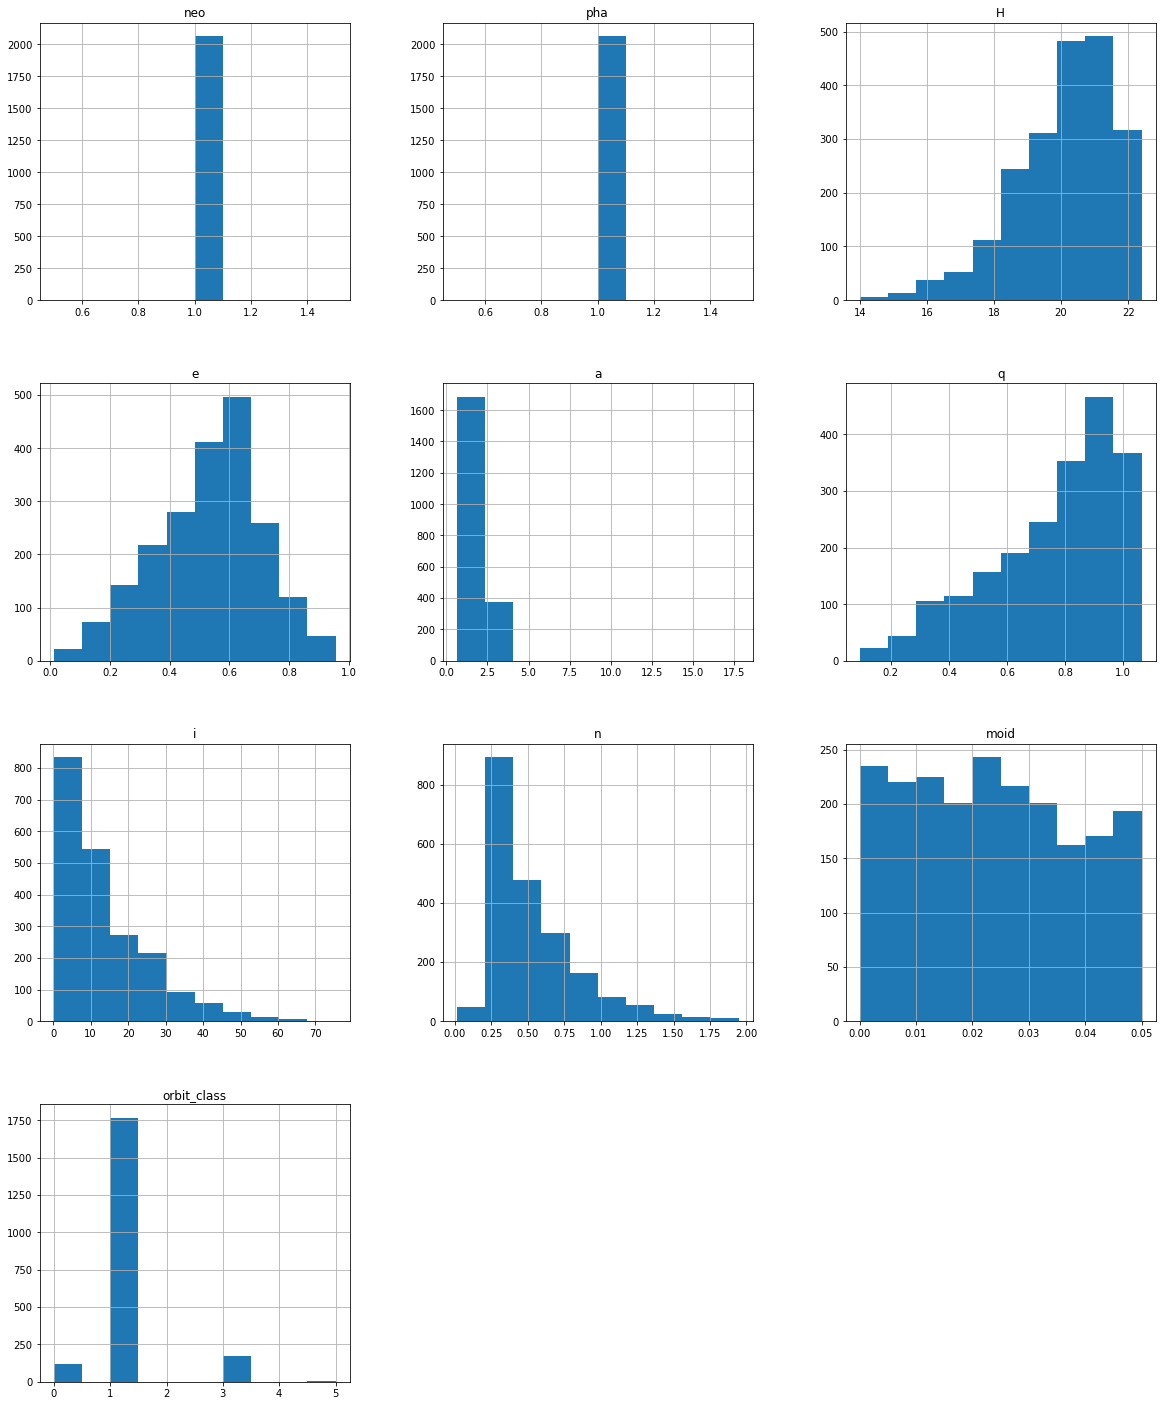

In [113]:
pha_true.hist(figsize=[20,25])

**Non-PHA Distributions**

array([[<AxesSubplot:title={'center':'neo'}>,
        <AxesSubplot:title={'center':'pha'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'q'}>],
       [<AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'moid'}>],
       [<AxesSubplot:title={'center':'orbit_class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

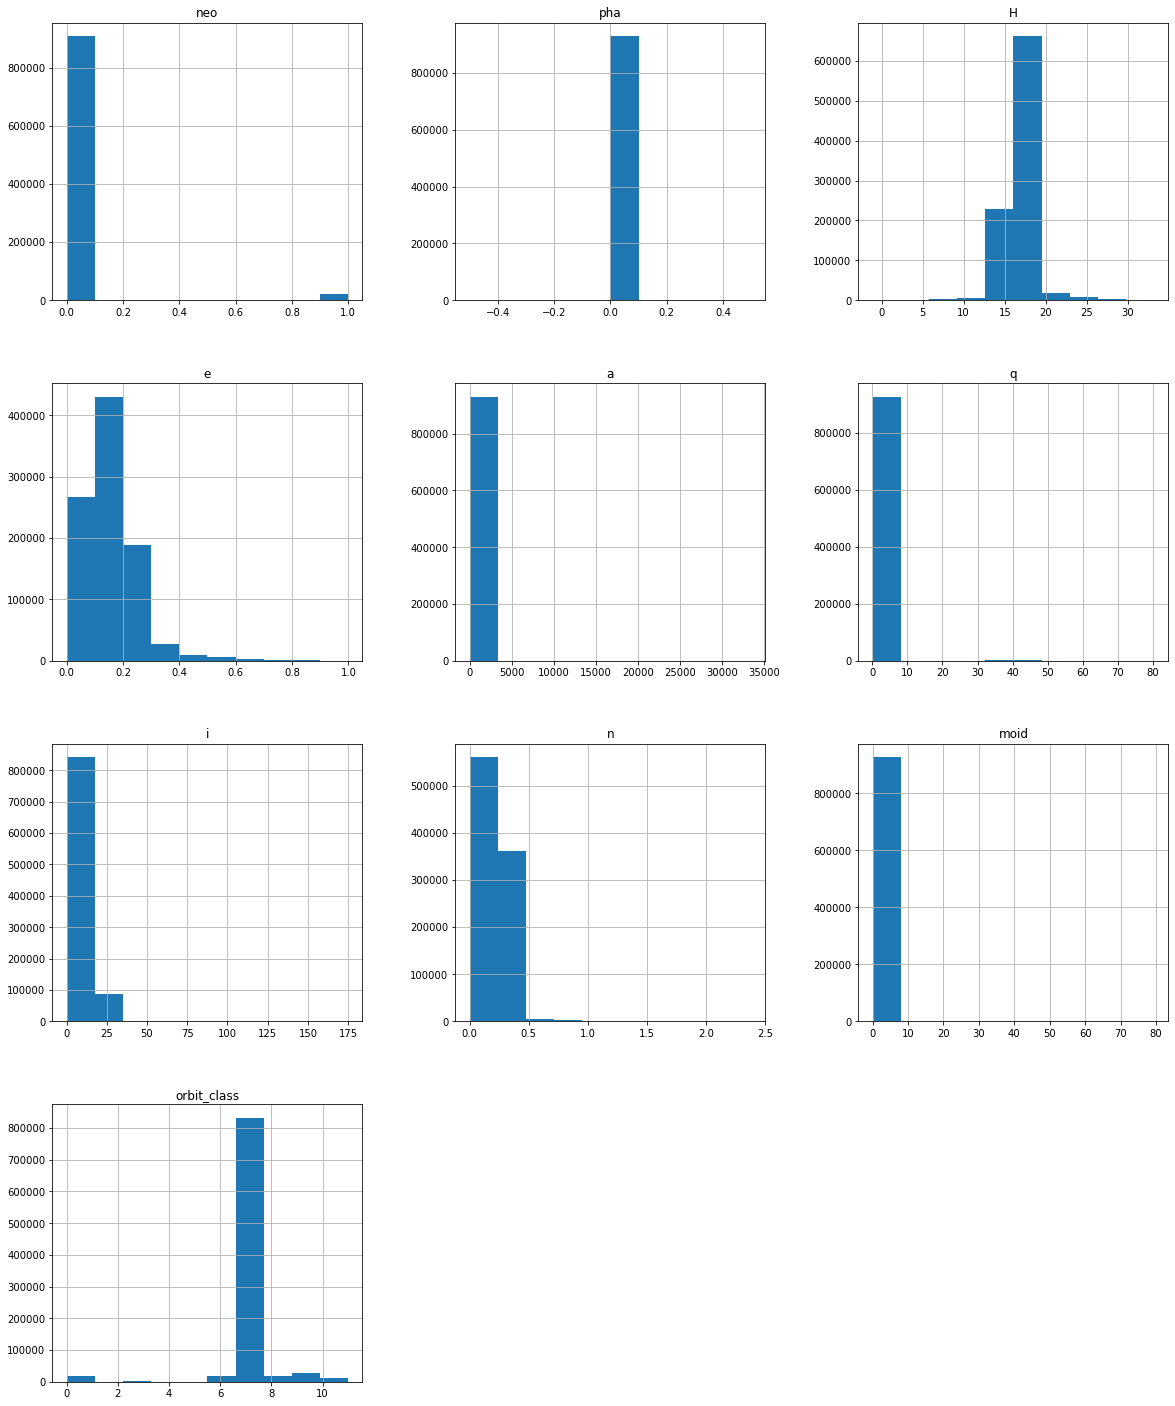

In [114]:
pha_false.hist(figsize=[20,25])

## Cluster Analysis

In [120]:
# k-means clustering
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

def cluster_analysis(df,x,y,k):
    # create pha filter
    pha_true = df.loc[df['pha']==1]
    columns = [x,y]
    k_filter = pha_true[columns]

    # get the x and y coordinates of the kmeans centers
    kmeans = KMeans(n_clusters=k, random_state=0).fit(k_filter)
    cluster_x = [kmeans.cluster_centers_[i][0] for i in range(k)]
    cluster_y = [kmeans.cluster_centers_[i][1] for i in range(k)]
    
    # cluster labels added to pha frame
    pha_cluster = pha_true.assign(cluster = kmeans.labels_)

    # plot
    sns.scatterplot(data=df, x=x, y=y, color='gray', alpha=0.3, label='not pha')
    sns.scatterplot(data=pha_cluster, x=x, y=y, hue='cluster', 
                    alpha=1, palette='tab10')
    plt.scatter(cluster_x, cluster_y, marker='x', color='black', s=100)

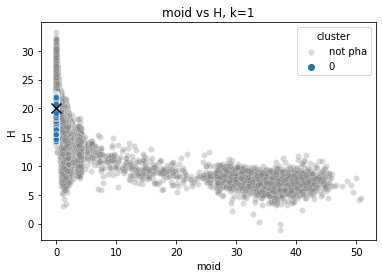

In [166]:
cluster_analysis(df_train,'moid','H',1)
plt.title("moid vs H, k=1")
plt.show()

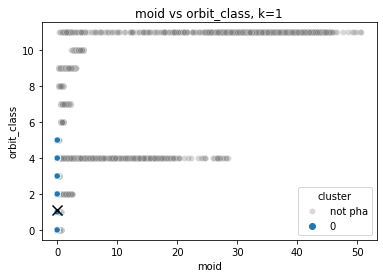

In [121]:
cluster_analysis(df_train,'moid','orbit_class',1)
plt.title("moid vs orbit_class, k=1")
plt.show()

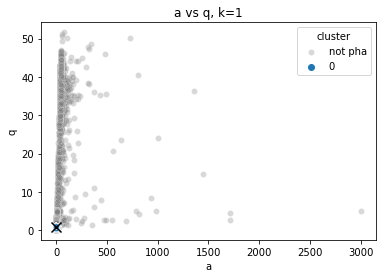

In [45]:
cluster_analysis(df_train,'a','q',1)
plt.title("a vs q, k=1")
plt.show()

In [117]:
# k-means clustering
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

def cluster_analysis(df,x,y,k):
    # create pha filter
    pha_true = df.loc[df['pha']==1]
    columns = [x,y]
    k_filter = pha_true[columns]

    # get the x and y coordinates of the kmeans centers
    kmeans = KMeans(n_clusters=k, random_state=0).fit(k_filter)
    cluster_x = [kmeans.cluster_centers_[i][0] for i in range(k)]
    cluster_y = [kmeans.cluster_centers_[i][1] for i in range(k)]
    
    # cluster labels added to pha frame
    pha_cluster = pha_true.assign(cluster = kmeans.labels_)

    # plot
    sns.scatterplot(data=pha_cluster, x=x, y=y, hue='cluster', 
                    alpha=1, palette='tab10')
    plt.scatter(cluster_x, cluster_y, marker='x', color='black', s=100)

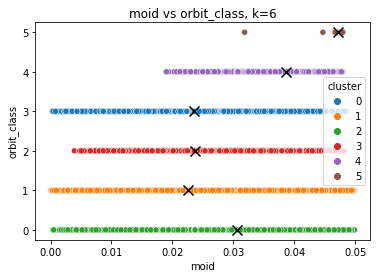

In [118]:
cluster_analysis(df_train,'moid','orbit_class',6)
plt.title("moid vs orbit_class, k=6")
plt.show()

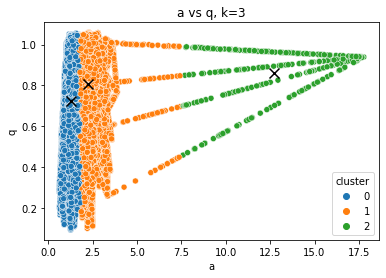

In [51]:
cluster_analysis(df_train,'a','q',3)
plt.title("a vs q, k=3")
plt.show()

**Split dataset**

In [31]:
x = df.drop(['pha'],axis=1) # x = columns except pha
y = df['pha']     # y = only pha column. 

In [32]:
y.value_counts()

0    930264
1      2066
Name: pha, dtype: int64

**Split into training and testing sets**

In [33]:
# create training and testing sets for x and y.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [34]:
# shape of sets (rows, columns)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((745864, 9), (186466, 9), (745864,), (186466,))

**Use SMOTE oversampling technique to balance the minority class in the training set**

In [35]:
sampler = SMOTE(random_state = 0)
x_train, y_train = sampler.fit_resample(x_train, y_train) 

In [36]:
# shape of sets (rows, columns)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1488428, 9), (186466, 9), (1488428,), (186466,))

In [37]:
y_train.value_counts()

0    744214
1    744214
Name: pha, dtype: int64

In [38]:
y_test.value_counts()

0    186050
1       416
Name: pha, dtype: int64

The dataset is very imbalanced and needed to be oversampled using the SMOTE technique. Oversampling before splitting the data can cause the same samples to appear in both training and testing sets and possibly overfitting, so SMOTE was used after splitting the data on the training set. The testing set was left imbalanced in order to remain a true testing set with new data. 

# Modeling

In [39]:
def Model(ML):
    model = ML
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('Accuracy score: ', model.score(x_test, y_test).round(3))
    print(metrics.classification_report(y_test, predictions, zero_division=0))
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('--------------------------------------------------------------------------------------------')

print('Decision Tree Classifier: ')
print(Model(DecisionTreeClassifier(random_state=0)))
print('Gaussian Naive Bayes Classifier: ')
print(Model(GaussianNB()))
print('Logistic Regression: ')
print(Model(LogisticRegression(random_state=0)))

Decision Tree Classifier: 
Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    186050
           1       0.99      0.98      0.98       416

    accuracy                           1.00    186466
   macro avg       0.99      0.99      0.99    186466
weighted avg       1.00      1.00      1.00    186466

[[186044      6]
 [     7    409]]
--------------------------------------------------------------------------------------------
None
Gaussian Naive Bayes Classifier: 
Accuracy score:  0.983
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    186050
           1       0.11      1.00      0.20       416

    accuracy                           0.98    186466
   macro avg       0.56      0.99      0.60    186466
weighted avg       1.00      0.98      0.99    186466

[[182807   3243]
 [     0    416]]
-------------------------------------------------------------------------

In [40]:
from sklearn.model_selection import GridSearchCV
grid_models = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0], 
                                'max_depth':[10,20,30,40,50,60,None], 'splitter':['best', 'random']}]),
        (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
        (LogisticRegression(),[{'solver':['saga','liblinear'],'C':[0.25,0.5,0.75,1],'random_state':[0]}])] 

for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    predictions = grid.predict(x_test)
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('Accuracy score: ', metrics.accuracy_score(y_test, predictions).round(3), ', ',
    'Precision score: ', metrics.precision_score(y_test, predictions, zero_division=0).round(2), ', ',
    'Recall score: ', metrics.recall_score(y_test, predictions, zero_division=0).round(2), ', ',
    'F1 score: ', metrics.f1_score(y_test, predictions, zero_division=0).round(2))
    print(confusion_matrix(y_test, predictions, labels=[0,1]))
    print('--------------------------------------------------------------------------------------------')

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.98 ,  F1 score:  0.98
[[186043      7]
 [     8    408]]
--------------------------------------------------------------------------------------------
GaussianNB():
Best Accuracy : 99.13%
Best Parameters :  {'var_smoothing': 1e-09}
Accuracy score:  0.983 ,  Precision score:  0.11 ,  Recall score:  1.0 ,  F1 score:  0.2
[[182807   3243]
 [     0    416]]
--------------------------------------------------------------------------------------------
LogisticRegression():
Best Accuracy : 99.41%
Best Parameters :  {'C': 1, 'random_state': 0, 'solver': 'liblinear'}
Accuracy score:  0.978 ,  Precision score:  0.09 ,  Recall score:  1.0 ,  F1 score:  0.17
[[181984   4066]
 [     0    416]]
--------------------------------------------------------------------------------------------


In [104]:
def GridSearch(maxdepth):
    grid_models = [(DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0], 
                     'max_depth':[maxdepth], 'splitter':['best', 'random']}])]
    for i,j in grid_models:
        grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
        grid.fit(x_train, y_train)
        best_accuracy = grid.best_score_
        best_param = grid.best_params_
        predictions = grid.predict(x_test)
        print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
        print('Best Parameters : ',best_param)
        print('Accuracy score: ', metrics.accuracy_score(y_test, predictions).round(3), ', ',
        'Precision score: ', metrics.precision_score(y_test, predictions, zero_division=0).round(2), ', ',
        'Recall score: ', metrics.recall_score(y_test, predictions, zero_division=0).round(2), ', ',
        'F1 score: ', metrics.f1_score(y_test, predictions, zero_division=0).round(2))
        print(confusion_matrix(y_test, predictions, labels=[0,1]))
        print('--------------------------------------------------------------------------------------------')

In [106]:
print(GridSearch(4))

DecisionTreeClassifier():
Best Accuracy : 99.99%
Best Parameters :  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.95 ,  Recall score:  1.0 ,  F1 score:  0.97
[[186028     22]
 [     1    415]]
--------------------------------------------------------------------------------------------
None


In [113]:
print(GridSearch(5))

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 5, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.99 ,  F1 score:  0.99
[[186042      8]
 [     4    412]]
--------------------------------------------------------------------------------------------
None


In [109]:
print(GridSearch(6))

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 6, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.99 ,  F1 score:  0.99
[[186042      8]
 [     4    412]]
--------------------------------------------------------------------------------------------
None


In [110]:
print(GridSearch(7))

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 7, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.99 ,  F1 score:  0.98
[[186042      8]
 [     5    411]]
--------------------------------------------------------------------------------------------
None


In [111]:
print(GridSearch(8))

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 8, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.99 ,  F1 score:  0.98
[[186043      7]
 [     6    410]]
--------------------------------------------------------------------------------------------
None


In [112]:
print(GridSearch(9))

DecisionTreeClassifier():
Best Accuracy : 100.00%
Best Parameters :  {'criterion': 'gini', 'max_depth': 9, 'random_state': 0, 'splitter': 'best'}
Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.98 ,  F1 score:  0.98
[[186043      7]
 [     9    407]]
--------------------------------------------------------------------------------------------
None


Accuracy score:  1.0 ,  Precision score:  0.98 ,  Recall score:  0.99 ,  F1 score:  0.99
[[186042      8]
 [     4    412]]


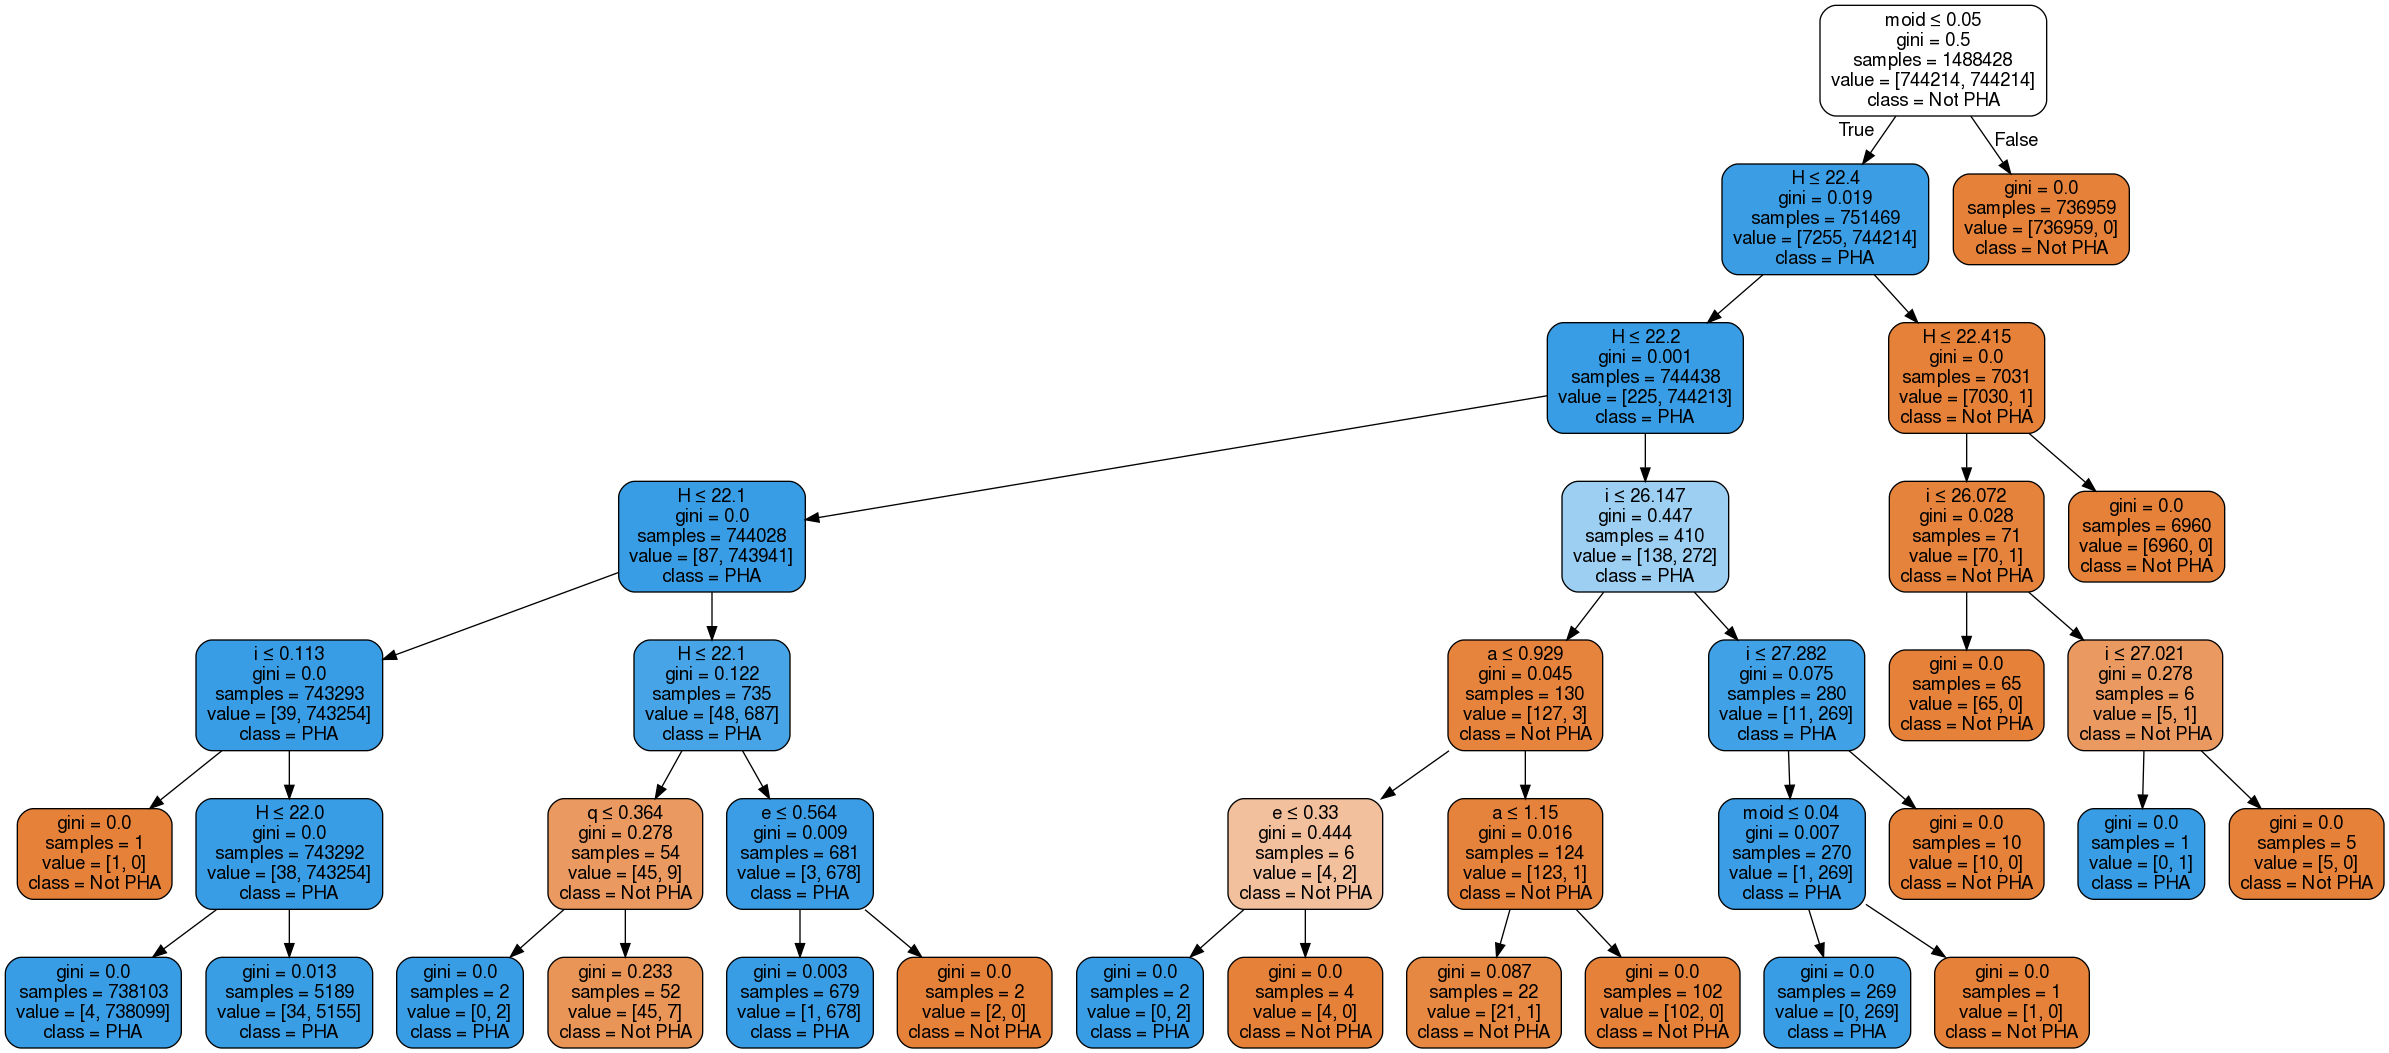

In [77]:
# Decision Tree classifer object
from sklearn.metrics import confusion_matrix
from six import StringIO 

tree = DecisionTreeClassifier(criterion='gini', random_state=0, splitter='best', max_depth=6)
# Train
tree = tree.fit(x_train,y_train)
# Test response prediction
predictions = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, predictions).round(3), ', ',
    'Precision score: ', metrics.precision_score(y_test, predictions, zero_division=0).round(2), ', ',
    'Recall score: ', metrics.recall_score(y_test, predictions, zero_division=0).round(2), ', ',
    'F1 score: ', metrics.f1_score(y_test, predictions, zero_division=0).round(2))
print(confusion_matrix(y_test, predictions, labels=[0,1]))

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns,class_names=['Not PHA','PHA'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pha.png')
Image(graph.create_png())

In [93]:
y_test.loc[(y_test ==0)]

819645    0
739305    0
309411    0
865141    0
766274    0
         ..
234984    0
472949    0
81887     0
815767    0
597008    0
Name: pha, Length: 186050, dtype: int64

In [97]:
y_test.loc[(y_test ==1)]

562489    1
546324    1
643838    1
723248    1
545255    1
         ..
573276    1
85712     1
907164    1
10114     1
414286    1
Name: pha, Length: 416, dtype: int64

In [98]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=0, splitter='best', max_depth=6)
# Train
dtc = dtc.fit(x_train,y_train)
# Test response prediction
predictPHA = dtc.predict(x_test.loc[[562489, 546324, 643838, 85712, 10114, 
                                     723248, 739305, 766274, 309411, 865141, 81887, 597008]])

In [99]:
print(predictPHA)

[1 1 1 1 1 1 0 0 0 0 0 0]


In [100]:
y_test.loc[[562489, 546324, 643838, 85712, 10114, 723248, 739305, 766274, 309411, 865141, 81887, 597008]]

562489    1
546324    1
643838    1
85712     1
10114     1
723248    1
739305    0
766274    0
309411    0
865141    0
81887     0
597008    0
Name: pha, dtype: int64